In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats


# Read the data

In [35]:
data=pd.read_csv("segmentation data.csv")
df=data.drop(["ID"], axis=1)
df2=df.copy()

# Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


# define Numerical and Categorical Variable before explore


In [4]:
numerik=df[['Age', 'Income']]
kategorik=df.drop(['Age', 'Income'], axis=1)

# Exploratory data analysis

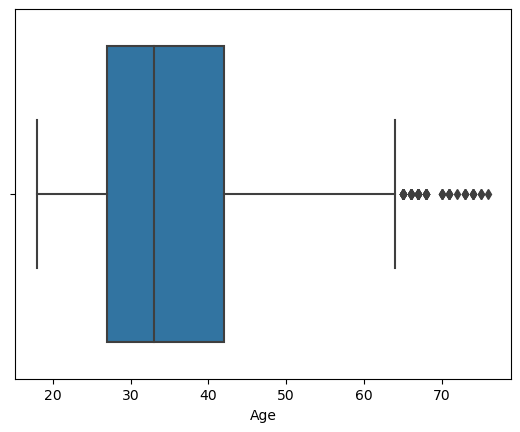

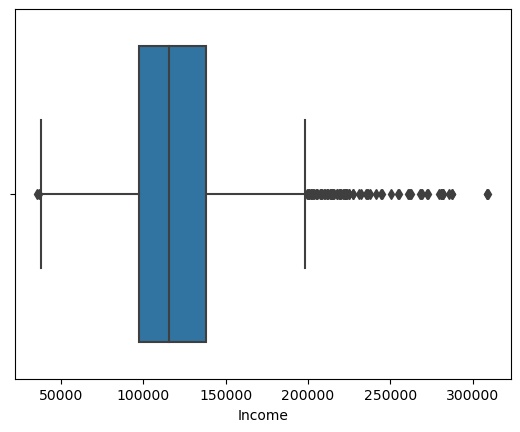

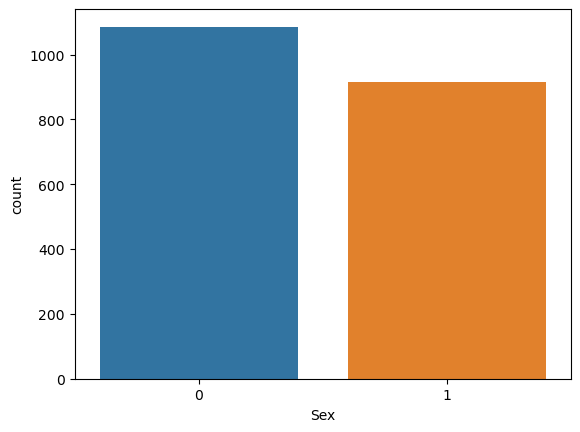

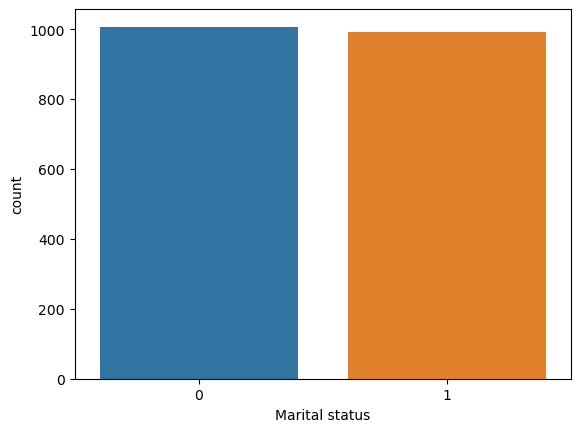

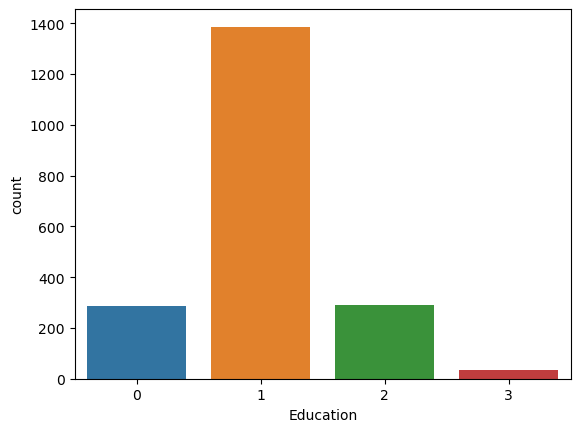

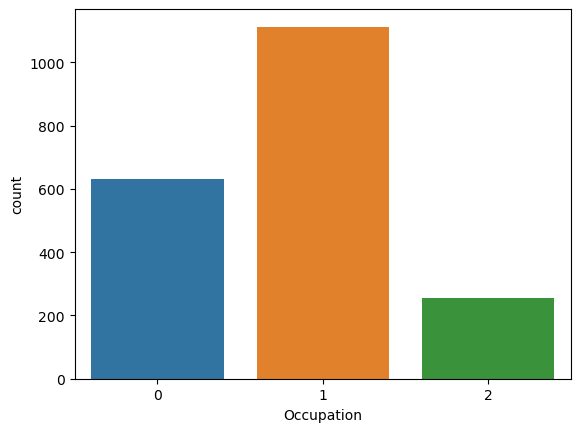

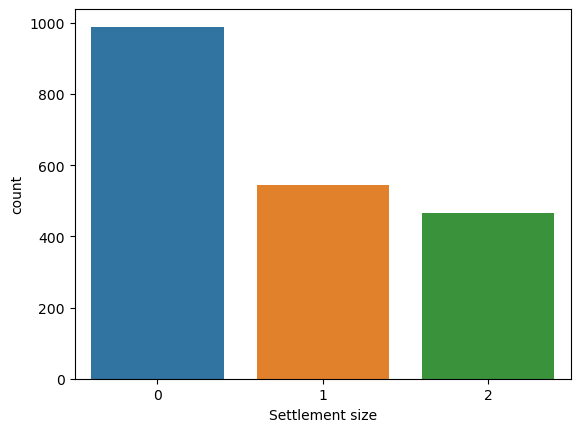

In [6]:
for i in numerik:
    plt.figure()
    sns.boxplot(data=numerik, x=i)

for i in kategorik:
    plt.figure()
    sns.countplot(data=kategorik, x=i)


# STandardized Data

In [7]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
scaled_data_km = scaler.fit_transform(df.iloc[:,1:])
scaled_data_km


array([[-0.99302433,  2.65361447,  1.60432297,  0.09752361,  0.29682303,
         1.552326  ],
       [ 1.00702467, -1.18713209, -0.06337243,  0.78265438,  0.29682303,
         1.552326  ],
       [-0.99302433,  1.11731585, -0.06337243, -0.83320224, -1.26952539,
        -0.90972951],
       ...,
       [-0.99302433, -0.41898277, -1.73106782, -0.90695688, -1.26952539,
        -0.90972951],
       [ 1.00702467, -1.01643224, -0.06337243, -0.60332923, -1.26952539,
        -0.90972951],
       [-0.99302433, -0.93108232, -1.73106782, -1.3789866 , -1.26952539,
        -0.90972951]])

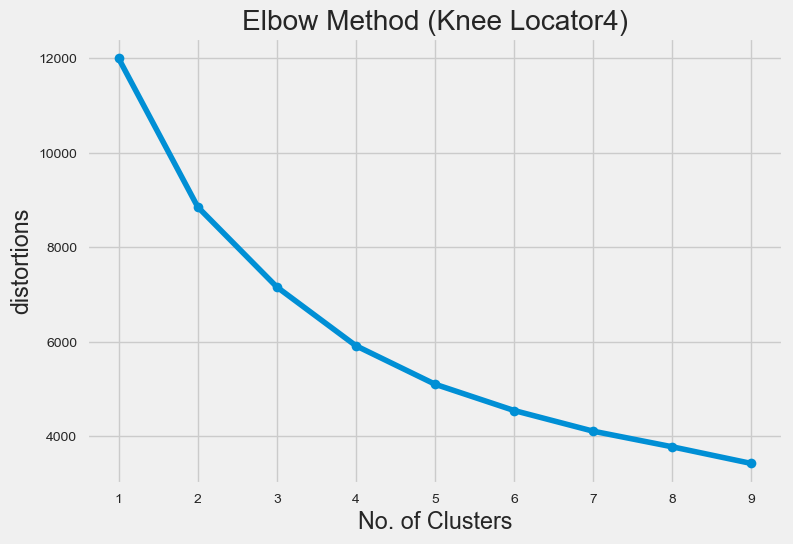

In [21]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering ,KMeans, DBSCAN

n=10
distortions = []
K = range(1,n)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_data_km)
    distortions.append(kmeanModel.inertia_)
from kneed import KneeLocator
kl = KneeLocator(range(1, n), distortions, curve="convex", direction="decreasing")
kl.elbow    
    
plt.style.use("fivethirtyeight")
plt.plot(range(1,n),distortions , marker = "o")
plt.title("Elbow Method (Knee Locator = '{}')".format(kl.elbow))
plt.xlabel("No. of Clusters")
plt.ylabel("distortions")
plt.show()


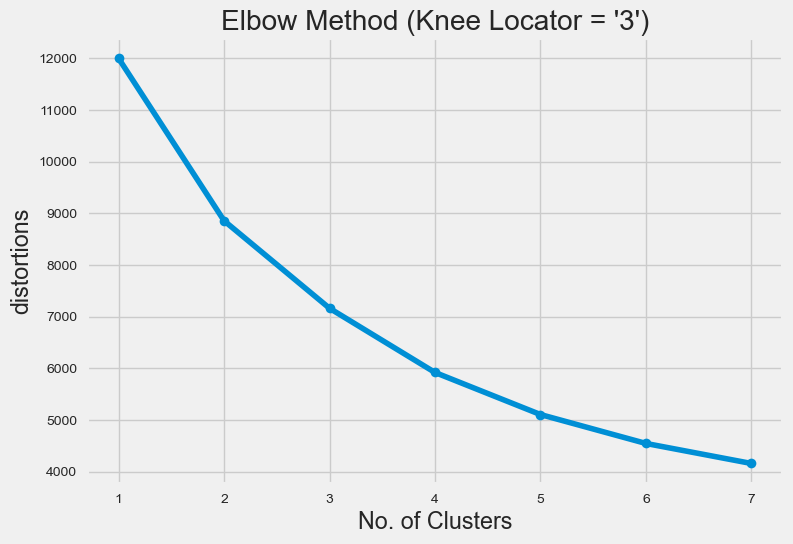

In [22]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering ,KMeans, DBSCAN

n=8
distortions = []
K = range(1,n)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_data_km)
    distortions.append(kmeanModel.inertia_)
from kneed import KneeLocator
kl = KneeLocator(range(1, n), distortions, curve="convex", direction="decreasing")
kl.elbow    
    
plt.style.use("fivethirtyeight")
plt.plot(range(1,n),distortions , marker = "o")
plt.title("Elbow Method (Knee Locator = '{}')".format(kl.elbow))
plt.xlabel("No. of Clusters")
plt.ylabel("distortions")
plt.show()



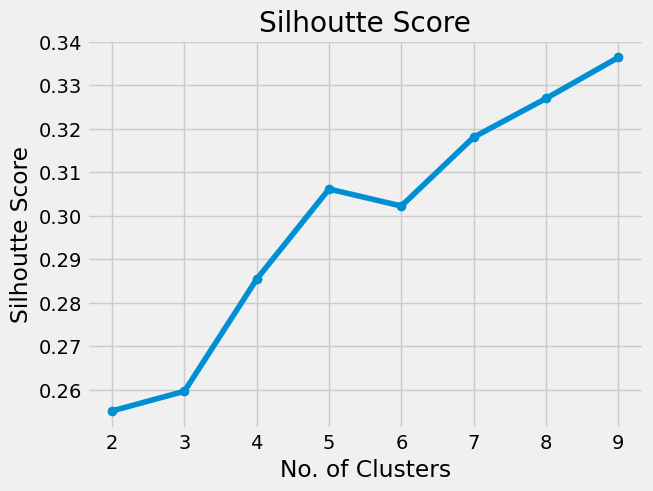

In [10]:
kmean_scores = []
K = range(2,n)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    labels= kmeanModel.fit_predict(scaled_data_km)
    kmean_scores.append(silhouette_score(scaled_data_km, labels))
    
    
plt.style.use("fivethirtyeight")
plt.plot(range(2,n),kmean_scores , marker = "o")
plt.title("Silhoutte Score")
plt.xlabel("No. of Clusters")
plt.ylabel("Silhoutte Score")
plt.show()


In [18]:
kmean_scores

[0.2550943307198448,
 0.259609848567606,
 0.2853910268550787,
 0.30610232261336123,
 0.30219604676434175,
 0.31800762257442305,
 0.32692103465239347,
 0.3363442795527901]

In [20]:
silhouette_score(scaled_data_km, labels,metric='euclidean')

0.3363442795527901

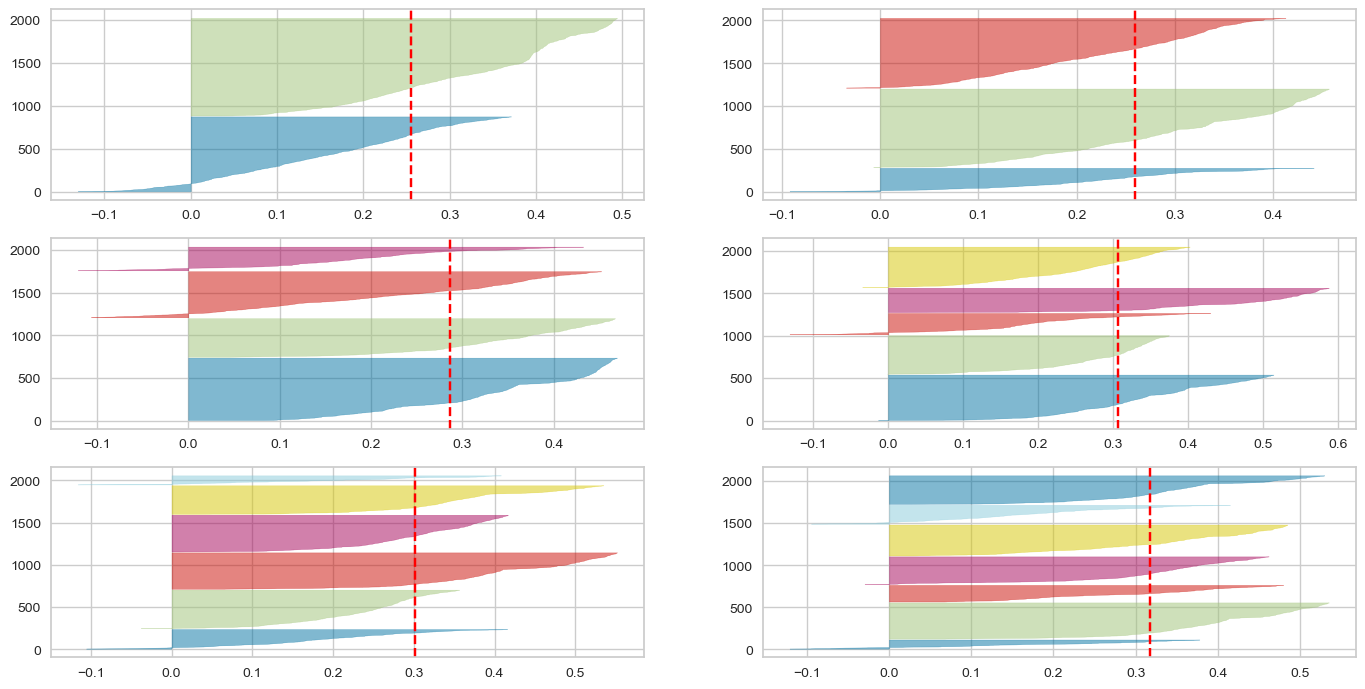

In [17]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5,6,7]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_data_km) 


In [25]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(scaled_data_km)
y_kmeanModel = kmeanModel.fit_predict(scaled_data_km)
y_kmeanModel
    

array([0, 2, 1, ..., 1, 1, 1])

In [26]:
df['label']=y_kmeanModel

In [27]:
df.groupby('label').mean().T

label,0,1,2
Sex,0.536913,0.613861,0.193642
Marital status,0.684564,0.575248,0.300578
Age,55.221477,31.223762,34.430636
Education,2.120805,0.897030,0.777457
Income,150847.003356,98990.153465,140139.271676
Occupation,0.989933,0.462376,1.241329
Settlement size,0.969799,0.143564,1.508671


# K Prototypes

In [36]:
for i in kategorik:
     df2[i]=df2[i].map(str)

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sex              2000 non-null   object
 1   Marital status   2000 non-null   object
 2   Age              2000 non-null   int64 
 3   Education        2000 non-null   object
 4   Income           2000 non-null   int64 
 5   Occupation       2000 non-null   object
 6   Settlement size  2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


In [ ]:
categorical_features_idx = [0,1, 3, 5, 6]

In [39]:
from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters=3, verbose=2, max_iter=20).fit(df2.values, categorical=categorical_features_idx)


ModuleNotFoundError: No module named 'kmodes'

In [ ]:
clusters = kproto.predict(mark_array, categorical=categorical_features_idx)


In [30]:
categorical_features_idx = [0, 2, 4, 9]


array([[ 0,  0, 67, ...,  1,  2,  0],
       [ 1,  1, 22, ...,  1,  2,  2],
       [ 0,  0, 49, ...,  0,  0,  1],
       ...,
       [ 0,  0, 31, ...,  0,  0,  1],
       [ 1,  1, 24, ...,  0,  0,  1],
       [ 0,  0, 25, ...,  0,  0,  1]], dtype=int64)

In [40]:
conda install kmodes

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - kmodes

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.


